In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import pearsonr

### - Ejercicio 1

Descarga el dataset adjunto de datos oficiales de la UEFA y selecciona un atributo del conjunto de datos. Calcula el p-valor y di si rechaza la hipótesis nula cogiendo un alfa de 5%. 

In [2]:
df = pd.read_csv(r"C:\Users\dpino\Documents\DATA SCIENCE\Jupyter\BOOTCAMP\T5.1\Lligues europees UEFA.csv", sep=";", header=None, engine="python", encoding="latin-1")
pd.set_option('display.max_columns', 500)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
1,1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.6,W W W W D,52739,Kevin De Bruyne - 15,Ederson
2,2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
3,3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.3,73,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
4,4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51,1.5,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
5,5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.9,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
6,6,Milan,ITA,1,37,25,8,4,66,31,35,83,2.24,60,34.4,25.6,0.69,W W W W W,42388,Rafael Leão - 11,Mike Maignan
7,7,Inter,ITA,2,37,24,9,4,81,32,49,81,2.19,78.1,38.2,39.9,1.08,W L W W W,41995,Lautaro Martínez - 21,Samir Handanovi?
8,8,Napoli,ITA,3,37,23,7,7,71,31,40,76,2.05,58.5,29.9,28.6,0.77,D L W W W,26681,Victor Osimhen - 14,David Ospina
9,9,Dortmund,GER,2,34,22,3,9,85,52,33,69,2.03,62.8,43.2,19.6,0.58,W L L W W,41800,Erling Haaland - 22,Gregor Kobel


In [3]:
df.columns = df.iloc[0]
df

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
1,1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.6,W W W W D,52739,Kevin De Bruyne - 15,Ederson
2,2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
3,3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.3,73,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
4,4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51,1.5,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,94,Bordeaux,FRA,20,37,5,13,19,48,89,-41,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
95,95,Venezia,ITA,20,37,6,8,23,34,69,-35,26,0.7,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
96,96,Watford,ENG,19,37,6,5,26,33,75,-42,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
97,97,Norwich City,ENG,20,37,5,7,25,23,79,-56,22,0.59,33,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul


Tenemos un Dataset con un conjunto de datos, donde se describe el rendimiento de los equipos de futbol en la liga UEFA. con atributos como, posicion del equipo en la tabla de posiciones(LgRk), Partidos jugados (MP),victorias que un equipo ha logrado (W), Empates (D), Derrotas (L), Goles a favor (GF), Goles en Contra (GA), Diferencia de goles (GD), Puntos (Pts), puntos por partido (Pts/G), Goles esperados (xG), Goles Esperados en Contra (xGA), Diferencia de Goles Esperada (xGD), Diferencia de Goles Esperada por 90 minutos (xGD/90), rendimiento del equipo en sus últimos cinco partidos (Last 5), Asistencia de espectadores (Attendance), el jugador que ha marcado más goles para el equipo (Top Team Scorer), portero titular o principal del equipo (Goalkeeper).

Hipotesis Nula: los puntos (Pts), de la liga inglesa y la liga española, son justos y no estan influenciados por ningun otro aspecto, tienen una distribucion normal.

Hipotesis Alternativa: los puntos (Pts), de la liga inglesa y la liga española, son justos y no estan influenciados por ningun aspecto, tienen una distribucion normal.

P. valor: ??

Alfa: 5%. 

Prueba de Hipotesis Estadistica a Usar = Prueba de Shapiro-Wilk.

por que este test? El test Shapiro-Wilk, nos permite saber si una variable, tiene una ditribucion normal, en muestras pequeñas. 

In [4]:
df.isnull().sum()

0
Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rk               99 non-null     object
 1   Squad            99 non-null     object
 2   Country          99 non-null     object
 3   LgRk             99 non-null     object
 4   MP               99 non-null     object
 5   W                99 non-null     object
 6   D                99 non-null     object
 7   L                99 non-null     object
 8   GF               99 non-null     object
 9   GA               99 non-null     object
 10  GD               99 non-null     object
 11  Pts              99 non-null     object
 12  Pts/G            99 non-null     object
 13  xG               99 non-null     object
 14  xGA              99 non-null     object
 15  xGD              99 non-null     object
 16  xGD/90           99 non-null     object
 17  Last 5           99 non-null     obje

In [6]:
df['Pts'] = pd.to_numeric(df['Pts'], errors='coerce')

convertimos tipos de datos de Object a Numerico para poder manipular los datos.

In [7]:
eng = df[df["Country"] == "ENG"]
esp = df[df["Country"] == "ESP"]

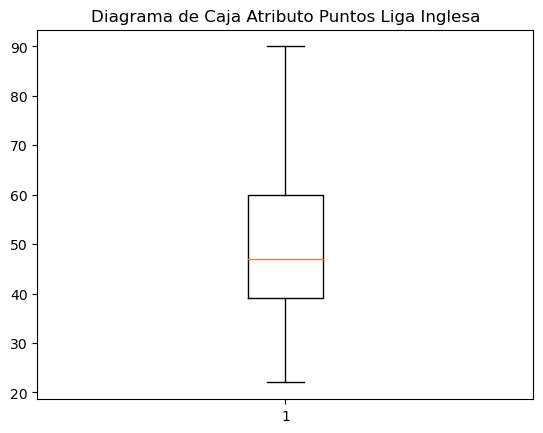

In [8]:
plt.boxplot(eng["Pts"])
plt.title('Diagrama de Caja Atributo Puntos Liga Inglesa')
plt.show()

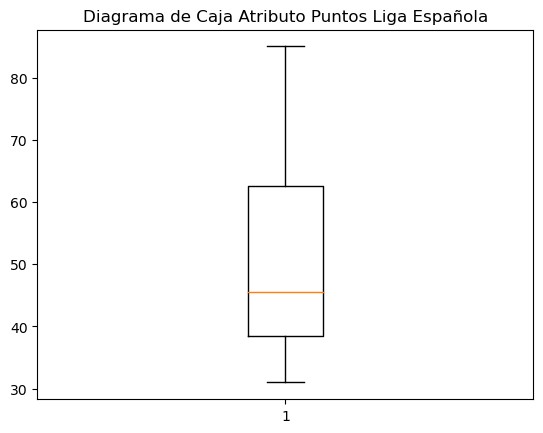

In [9]:
plt.boxplot(esp["Pts"])
plt.title('Diagrama de Caja Atributo Puntos Liga Española')
plt.show()

Las grafica Box plot, nos muestra que los datos tienen una tendencia a la normalidad, no existen outliers, en ningun grupo, la forma de la caja aunque no es simetrica el rango intercuartilico es aceptable y la mediana, parte la caja con tendencia a la mitad. la liga inglesa muestar mayor normalidad que la española en sus datos, la esapñola el rango intercuartilico es mas amplio y la mediana tiene a ser negativa.

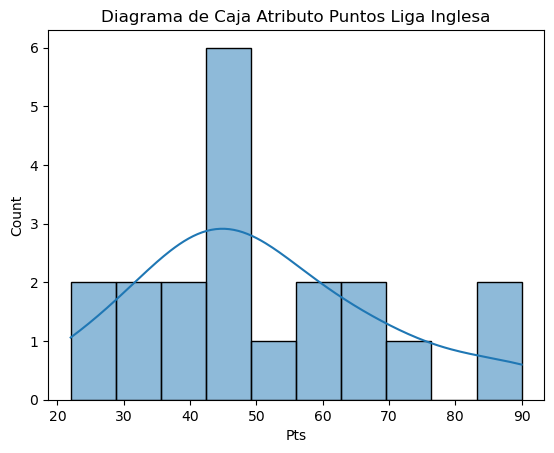

In [10]:
sns.histplot(eng["Pts"], bins=10, kde=True)
plt.title('Diagrama de Caja Atributo Puntos Liga Inglesa')
plt.show()

Liga Inglesa: Esta grafica nos muestra los rangos de puntos en x, y la cantidad de equipos que obtuvieron esos rangos de puntos en y. la mayoria de equipos (6), tuvo un rango de puntos de 42 a 49 puntos. los demas equipos tuvieron rangos de puntos diversos. muestra una grafica asemejando la campana que indica normalidad. Aunque se alarga al final, lo cual puede indicar cierta anomralidad.

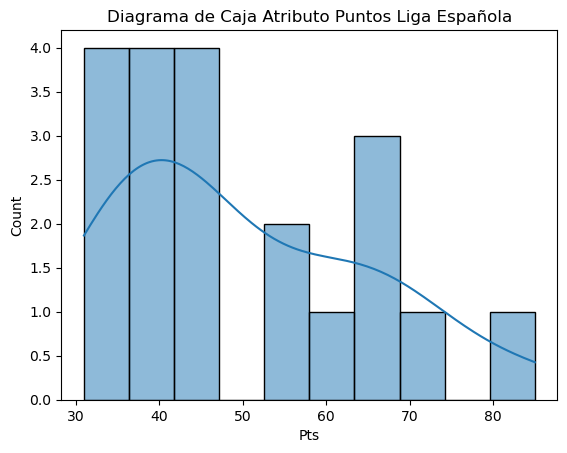

In [11]:
sns.histplot(esp["Pts"], bins=10, kde=True)
plt.title('Diagrama de Caja Atributo Puntos Liga Española')
plt.show()

Liga Española: En esta grafica de grangos de puntos en X y cantidad de equipos en Y, podemos observar que la liga española tuvo mas equipos con rangos de puntos bajos y entre mas rango de puntos menos equipos los obtuvieron. la forma de camapana se diluye. lo cual nos hace pensar que los datos podrian tender a no ser normales.

In [12]:
print("La liga inglesa tuvo un promedio de puntos por partidos de", eng["Pts"].mean())
print("La liga española tuvo un promedio de puntos por partidos de", esp["Pts"].mean())

La liga inglesa tuvo un promedio de puntos por partidos de 50.45
La liga española tuvo un promedio de puntos por partidos de 50.05


#### Prueba de Normalidad

In [13]:
from scipy.stats import shapiro
stat, p = shapiro(eng['Pts'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=0.950, p=0.374
Probably Gaussian


Liga inglesa: Debido a que p_value es de 0.374, que es mayor al valor alfa 0.05, No rechazamos la hipotesis nula. lo que significa que, los puntos (Pts), de la liga inglesa, son justos y no estan influenciados por ningun otro aspecto, tienen una distribucion normal.

In [14]:
from scipy.stats import shapiro
stat, p = shapiro(esp['Pts'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=0.919, p=0.096
Probably Gaussian


Liga Española: Debido a que p_value es de 0.096, que es mayor al valor alfa 0.05,  No rechazamos la hipotesis nula. lo que significa que, los puntos (Pts), de la liga española, son justos y no estan influenciados por ningun aspecto, tienen una distribucion normal.

En ambos grupos ( ingleses y españoles ) la variable  tiene una distribucion normal. 

### - Ejercicio 2

#### Atributo 1
Atributo: Asistencia y Puntos


Hipotesis Nula: No hay una relación significativa entre la cantidad de asistentes (Attendance) y la cantidad de puntos (Pts), en las ligas alemana e italiana.

Hpotesis alternativa: hay una relación significativa entre la cantidad de asistentes (Attendance) y la cantidad de puntos (Pts), en las ligas alemana e italiana.

P. valor: ??

Alpha: 5%

Metodo a usar: Coeficiente de correlación de Spearman.

por que  La prueba de correlación de Spearman?

Nota: Debo tener en cuenta que necesito saber si los datos son o no normales para elegir que prueba hacer, por tanto debo aplicar prueba de normalidad. que me ayuda a soportar que la prueba escogida es la addecuada.

Analisis:

Pearson: Relacion Lineal, dos variables, requiere que sean normales.

Spearman: No hay relación lineal entre variables,deben ser dos variables y no requiere normalidad, tiene una relacion monotona (linea de tendencia en dirección constante). 

Kendall: No relacion lineal, dos variables y no requiere normalidad, para mas de dos varialbes es mas efectiva. mas robusta en muestras pequeñas, no requiere monotonía. no parametrica.

Chi - cuadrado: para varialbes categoricas.

In [15]:
df["Attendance"] = pd.to_numeric(df['Attendance'], errors='coerce') #cambiar objecto a numerico solo 1 columna 
df[['Attendance', 'Pts']] = df[['Attendance', 'Pts']].apply(pd.to_numeric, errors='coerce') #cambiar objecto a numerico en mas de una columna  

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               99 non-null     object 
 1   Squad            99 non-null     object 
 2   Country          99 non-null     object 
 3   LgRk             99 non-null     object 
 4   MP               99 non-null     object 
 5   W                99 non-null     object 
 6   D                99 non-null     object 
 7   L                99 non-null     object 
 8   GF               99 non-null     object 
 9   GA               99 non-null     object 
 10  GD               99 non-null     object 
 11  Pts              98 non-null     float64
 12  Pts/G            99 non-null     object 
 13  xG               99 non-null     object 
 14  xGA              99 non-null     object 
 15  xGD              99 non-null     object 
 16  xGD/90           99 non-null     object 
 17  Last 5           9

In [17]:
ger = df[df["Country"] == "GER"]
ita = df[df["Country"] == "ITA"]

### EDA

#### ANALISIS INDIVIDUAL DE VARIABLES

<Figure size 800x500 with 0 Axes>

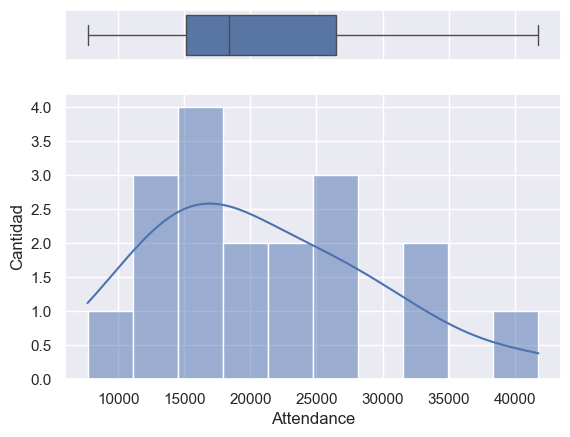

<Figure size 800x500 with 0 Axes>

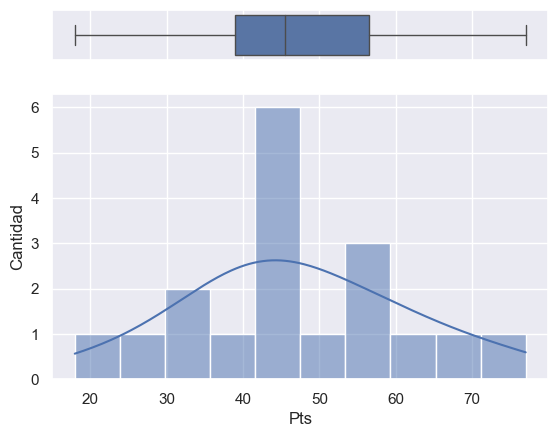

In [24]:
columns = ['Attendance', 'Pts']

for i in columns:
    plt.figure(figsize=(8, 5))
    sns.set()
    
    # Filtra los valores no nulos en la columna actual
    filtered_data = ger[ger[i].notna()]
    
    # Crea un subplot con dos áreas (boxplot y histograma)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    
    # Dibuja el boxplot en la parte superior en posición horizontal
    sns.boxplot(x=filtered_data[i], orient="h", ax=ax_box, linewidth=1.0)
    
    # Dibuja el histograma en la parte inferior
    sns.histplot(filtered_data[i], ax=ax_hist, bins=10, kde=True)
    
    # Añade títulos a los subplots
    ax_box.set(xlabel='')
    ax_hist.set(xlabel=i)
    
    plt.gca().set(xlabel= i,ylabel='Cantidad')

LIGA ALEMANA: 

Asistencia (Attendance): el boxplot no tiene datos extremos, el rango intercuartilico es amplio y la mediana tiene una asimetria negativa, los bigotes uno es mas amplio que el otro. el histograma muestra una especie de campana, podria indicar cierta normalidad de los datos.

Puntos (Pts): El blox tiene tendencia simetrica, la mediana tiene tendencia al centro de la caja y los bigostes tiene una dimencion similar, no hay outliers.

In [25]:
from scipy.stats import shapiro
columns = ['Attendance', 'Pts']
for column in columns:
    stat, p_value = shapiro(ger[column])
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

stat=0.955, p=0.096
Probably Gaussian
stat=0.988, p=0.096
Probably Gaussian


Conclusion Alemania: Los datos si son normales, a pesar de que el histograma no tuviese forma de campana, los datos no tenian ouliers.

<Figure size 800x500 with 0 Axes>

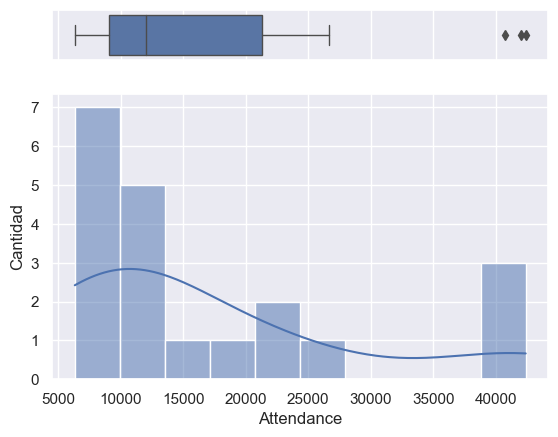

<Figure size 800x500 with 0 Axes>

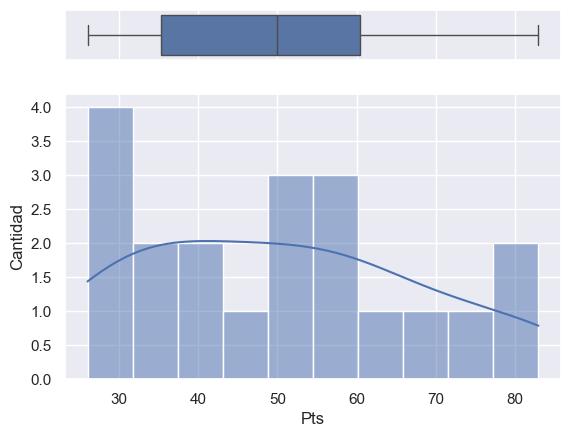

In [26]:
columns = ['Attendance', 'Pts']

for i in columns:
    plt.figure(figsize=(8, 5))
    sns.set()
    
    # Filtra los valores no nulos en la columna actual
    filtered_data = ita[ita[i].notna()]
    
    # Crea un subplot con dos áreas (boxplot y histograma)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    
    # Dibuja el boxplot en la parte superior en posición horizontal
    sns.boxplot(x=filtered_data[i], orient="h", ax=ax_box, linewidth=1.0)
    
    # Dibuja el histograma en la parte inferior
    sns.histplot(filtered_data[i], ax=ax_hist, bins=10, kde=True)
    
    # Añade títulos a los subplots
    ax_box.set(xlabel='')
    ax_hist.set(xlabel=i)
    
    plt.gca().set(xlabel= i,ylabel='Cantidad')

LIGA ITALIANA: 
Asistencia (Attendance): el boxplot  tiene datos extremos, el rango intercuartilico es amplio y la mediana tiene una asimetria negativa, los bigotes uno es mas amplio que el otro. pero vemos como hay datos extremos que fragmentan el box plot. el histograma pierde la forma de campana, podria indicar cierta anormalidad de los datos. 

Puntos (Pts): El blox es asimetrico, la mediana tiene tendencia a la derecha de la caja y los bigostes tiene una dimenciones diferentes, no hay outliers.

Nota: Para confirmar la normalidad de los datos, despues del analisis de graficas, deseo hacer un test de normalidad con shapiro.

In [27]:
from scipy.stats import shapiro
columns = ['Attendance', 'Pts']
for column in columns:
    stat, p_value = shapiro(ita[column])
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

stat=0.786, p=0.096
Probably Gaussian
stat=0.944, p=0.096
Probably Gaussian


Conclusion italiana: Los datos si son normales a pesar de tener outliers y de que la forma del histograma no es de campana.

Conclusion general: los datos de cada grupo son normales.

#### COMPROVAMOS CORRELACIÓN DE VARIABLES

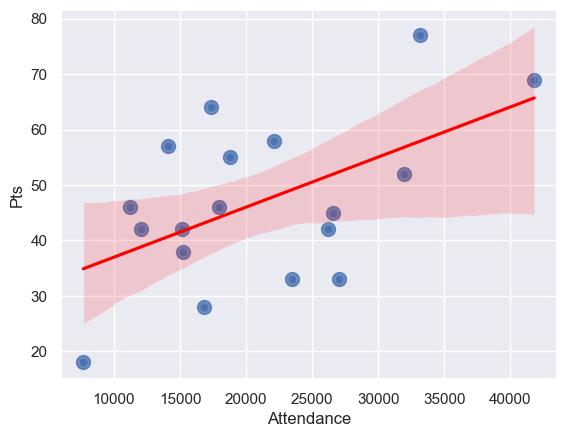

In [115]:
sns.scatterplot(x=ger['Attendance'], y=ger["Pts"], data=ger)
sns.regplot(x=ger['Attendance'], y=ger["Pts"], data=ger, scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.show()

LIGA ALEMANA: En este grafico de dispersión no se muestra una relacion lineal entre las variables ( que todos los puntos hagan una linea recta ), por tanto descartamos usar la prueba Pearson. por tanto Sperman o Kendall pueden ser usadas, pero la Sperman es mas adecuada cuando hay una monotonicidad que se mide a traves de una linea de tendencia en direccion contante (linea roja). esta prueba no requiere normalidad.

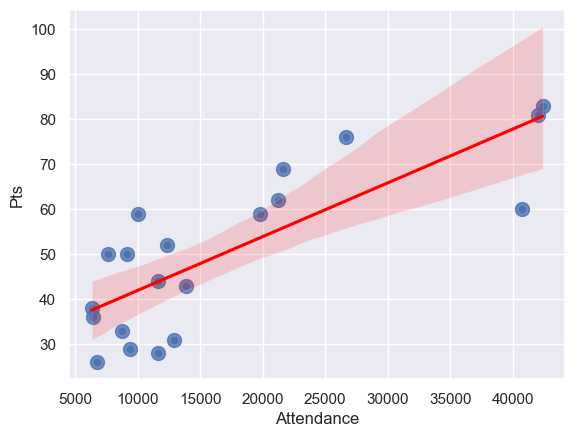

In [116]:
sns.scatterplot(x=ita['Attendance'], y=ita["Pts"], data=ger)
sns.regplot(x=ita['Attendance'], y=ita["Pts"], data=ger, scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.show()

LIGA ITALIANA:  la Spearman es mas adecuada cuando hay una monotonicidad que se mide a traves de una linea de tendencia en direccion contante. (linea roja), que nos muestra la grafica para este grupo. 

In [117]:
print("La liga alemana tuvo una asistencia de", ger['Attendance'].sum())
print("La liga italina tuvo una asistencia de", ita['Attendance'].sum())

La liga alemana tuvo una asistencia de 378451.0
La liga italina tuvo una asistencia de 341249.0


In [118]:
print("La liga alemana tuvo un total de puntos de", ger['Pts'].sum())
print("La liga italina tuvo un total de puntos de", ita['Pts'].sum())

La liga alemana tuvo un total de puntos de 845.0
La liga italina tuvo un total de puntos de 1009.0


#### APLICACION DE PRUEBAS DE HIPOTESIS ESTADISTICAS

In [119]:
from scipy.stats import spearmanr
stat, p = spearmanr(ger["Attendance"], ger["Pts"] )
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=0.386, p=0.113
Probably independent


LIGA ALEMANA: el p_value es mayor al alfa 0.05 y por tanto no rechazamos la Hipotesis nula de: No hay una relación significativa entre la cantidad de asistentes (Attendance) y la cantidad de puntos (Pts), en las ligas alemana. lo cual quieres decir que en la liga Alemana los resultados de los partidos, no estan influenciados por la cantidad de personas que vayan a ver el juego. podriamos decir que el equipo va a tener el mismo rendimiento en puntos si van muchos o pocos asistentes.  

In [121]:
from scipy.stats import spearmanr
stat, p = spearmanr(ita["Attendance"], ita["Pts"] )
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=0.761, p=0.000
Probably dependent


LIGA ITALIANA: el p_value de 0.000, nos indica que las dos variables son dependientes y por tanto rechazamos la Hipotesis nula de: No hay una relación significativa entre la cantidad de asistentes (Attendance) y la cantidad de puntos (Pts), en las ligas italiana. lo cual nos lleva a apoyar la hipotesis alternativa Ha, hay una relación significativa entre la cantidad de asistentes (Attendance) y la cantidad de puntos (Pts), para la liga italiana. al contrario de la liga Alemana, aqui si afecta la hinchada y el apoyo de la misma en la liga italiana, podriamos decir que el mayor ferbor del futbol, se traduce en que los equipos tengan mas puntos. esto es importante saberlo por que si las personas quieren mas puntos de sus equipos tendran asistir a los juegos.

### - Ejercicio 3

Atributo 1
Atributo: goles a favor (GF) - victorias que un equipo ha logrado (W) - los Puntos (Pts)

Hipotesis Nula: No hay una relación significativa entre , goles a favor (GF), las victorias que un equipo ha logrado (W) y los Puntos (Pts), en las ligas España y Alemania

Hipotesis alternativa: hay una relación significativa entre, goles a favor (GF), las victorias que un equipo ha logrado (W) y los Puntos (Pts), en las ligas de España y Alemania.

P. valor: ??

Alpha: 5%

Metodo a usar: Prueba de correlacion de rango Kendall.

por que La prueba de correlación de Kendall?

Analisis:

Kendall: No relacion lineal, dos variables o mas y no requiere normalidad. mas robusta en muestras pequeñas, no requiere monotonia, es no parametrica. ( no hay una distribucion normal). 
por este motivo descartamos pruebas como t-student, Anova, regresion lineal. es la unica prueba de correlacion que me permite tener tres variables simultameamente. con un proceso corto. 

In [122]:
df[['GF', 'W', 'Pts']] = df[['GF', 'W', 'Pts']].apply(pd.to_numeric, errors='coerce') #cambiar objecto a numerico en mas de una columna  

In [123]:
esp = df[df["Country"] == "ESP"]
ger = df[df["Country"] == "GER"]

In [124]:
ger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 4 to 98
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               18 non-null     object 
 1   Squad            18 non-null     object 
 2   Country          18 non-null     object 
 3   LgRk             18 non-null     object 
 4   MP               18 non-null     object 
 5   W                18 non-null     float64
 6   D                18 non-null     object 
 7   L                18 non-null     object 
 8   GF               18 non-null     float64
 9   GA               18 non-null     object 
 10  GD               18 non-null     object 
 11  Pts              18 non-null     float64
 12  Pts/G            18 non-null     object 
 13  xG               18 non-null     object 
 14  xGA              18 non-null     object 
 15  xGD              18 non-null     object 
 16  xGD/90           18 non-null     object 
 17  Last 5           1

### EDA

#### ANALISIS INDIVIDUAL DE VARIABLES

<Figure size 800x500 with 0 Axes>

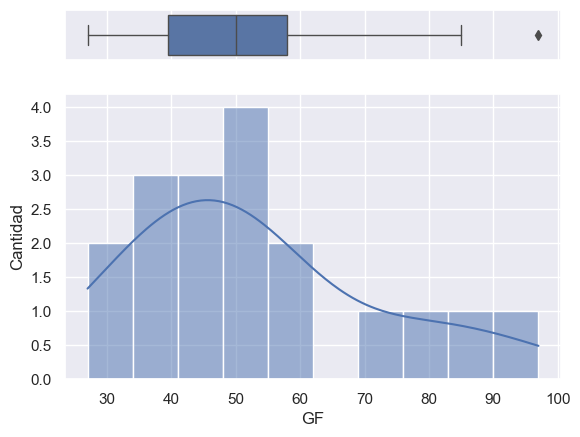

<Figure size 800x500 with 0 Axes>

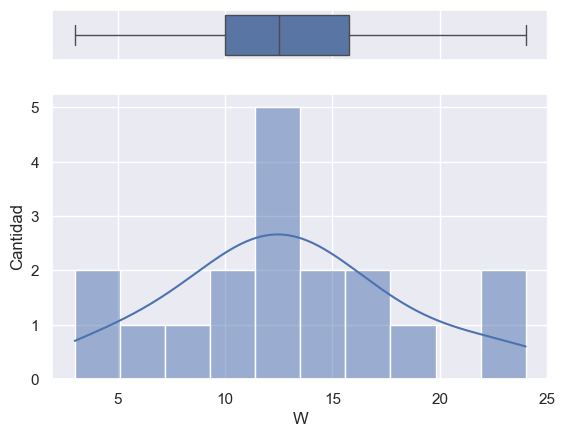

<Figure size 800x500 with 0 Axes>

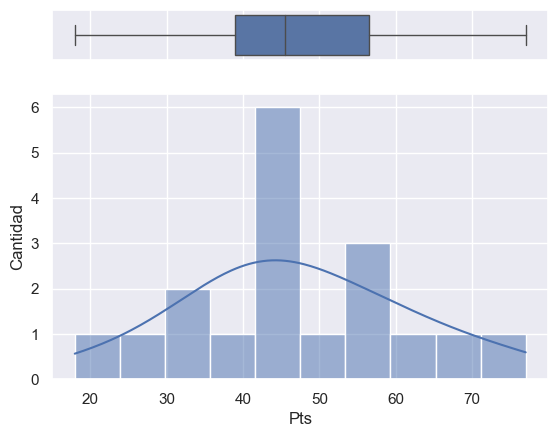

In [125]:
columns = ['GF', 'W', 'Pts']

for i in columns:
    plt.figure(figsize=(8, 5))
    sns.set()
    
    # Filtra los valores no nulos en la columna actual
    filtered_data = ger[ger[i].notna()]
    
    # Crea un subplot con dos áreas (boxplot y histograma)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    
    # Dibuja el boxplot en la parte superior en posición horizontal
    sns.boxplot(x=filtered_data[i], orient="h", ax=ax_box, linewidth=1.0)
    
    # Dibuja el histograma en la parte inferior
    sns.histplot(filtered_data[i], ax=ax_hist, bins=10, kde=True)
    
    # Añade títulos a los subplots
    ax_box.set(xlabel='')
    ax_hist.set(xlabel=i)
    
    plt.gca().set(xlabel= i,ylabel='Cantidad')

LIGA ALEMANA: 

Goles a favor(GF): el boxplot muestra datos extremos, el rango intercuartilico es amplio y la mediana tiene una asimetria positiva. los bigotes no son simetricos, el histograma muestra una campana al princio pero luego se va alargando una irregularidad al final. lo que hace pensar que no todos los datos son normales.

Victorias que un equipo ha logrado (W): El blox tiene tendencia simetrica, la mediana tiene tendencia al centro de la caja y los bigostes tiene una dimencion similar, no hay outliers.el histograma muestra forma de campana, podremos decir que los datos son normales.

Puntos (Pts):el boxplot no tiene datos extremos, el rango intercuartilico es amplio y la mediana tiene una asimetria negativa, los bigotes son iguales. el histograma muestra una especie de campana, podria indicar cierta normalidad de los datos.

Nota: Deseo saber si los datos son normales o no, para escoger que test estadistico hacer, ya que graficamente no se con exactitud si son normales o no. para esto hago un prueba de normalidad con Shapiro.

In [126]:
from scipy.stats import shapiro
columns = ['GF','W', 'Pts']
for column in columns:
    stat, p_value = shapiro(ger[column])
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

stat=0.924, p=0.000
Probably not Gaussian
stat=0.981, p=0.000
Probably not Gaussian
stat=0.988, p=0.000
Probably not Gaussian


Los datos no son normales comprobado con la prueba de hipotesis Shapiro.

<Figure size 800x500 with 0 Axes>

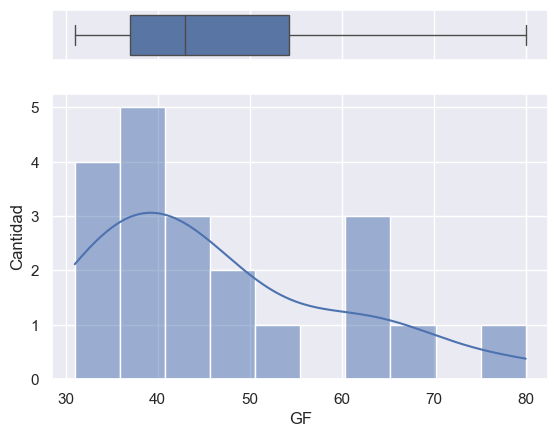

<Figure size 800x500 with 0 Axes>

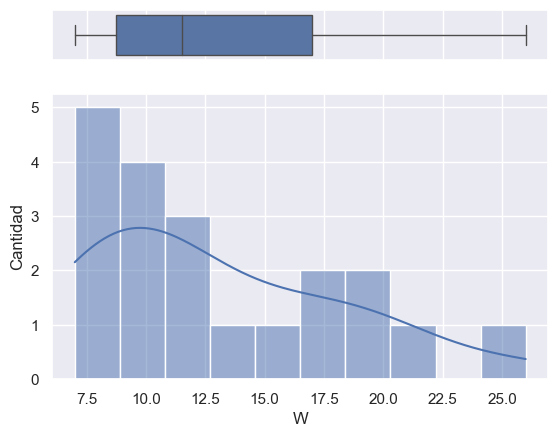

<Figure size 800x500 with 0 Axes>

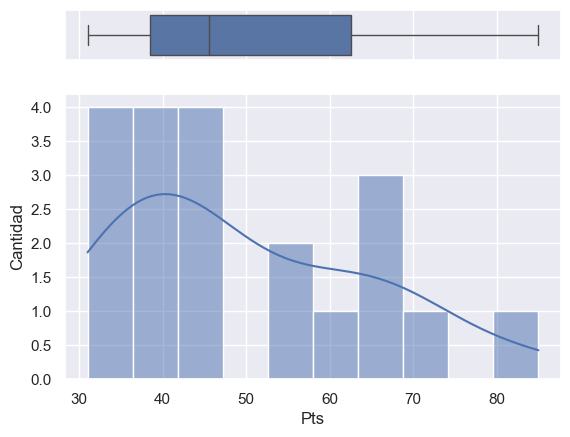

In [127]:
columns = ['GF', 'W', 'Pts']

for i in columns:
    plt.figure(figsize=(8, 5))
    sns.set()
    
    # Filtra los valores no nulos en la columna actual
    filtered_data = esp[esp[i].notna()]
    
    # Crea un subplot con dos áreas (boxplot y histograma)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    
    # Dibuja el boxplot en la parte superior en posición horizontal
    sns.boxplot(x=filtered_data[i], orient="h", ax=ax_box, linewidth=1.0)
    
    # Dibuja el histograma en la parte inferior
    sns.histplot(filtered_data[i], ax=ax_hist, bins=10, kde=True)
    
    # Añade títulos a los subplots
    ax_box.set(xlabel='')
    ax_hist.set(xlabel=i)
    
    plt.gca().set(xlabel= i,ylabel='Cantidad')

LIGA ESPAÑOLA: 

Goles a favor(GF): el boxplot que el rango intercuartilico es amplio y la mediana tiene una asimetria negativa. los bigotes no son simetricos, el histograma muestra una campana al princio pero luego se va alargando una irregularidad al final. lo que hace pensar que no todos los datos son normales.

Victorias que un equipo ha logrado (W): El blox tiene tendencia asimetrica, la mediana no tiene tendencia al centro de la caja y los bigostes tiene una dimencion distinta, no hay outliers.el histograma no muestra forma de campana, podremos decir que los datos no son normales.

Puntos (Pts):el boxplot no tiene datos extremos, el rango intercuartilico es amplio y la mediana tiene una asimetria negativa, el box es asimetrico, los bigotes tienen dimencion distinta. el histograma no muestra una campana, podria indicar cierta anormalidad de los datos.

Nota: Deseo saber si los datos son normales o no, para escoger que test estadistico hacer, ya que graficamente no se con exactitud si son normales o no. para esto hago un prueba de normalidad con Shapiro.

#### Prueba de normalidad con shapiro

In [128]:
from scipy.stats import shapiro
columns = ['GF','W', 'Pts']
for column in columns:
    stat, p_value = shapiro(esp[column])
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

stat=0.888, p=0.000
Probably not Gaussian
stat=0.905, p=0.000
Probably not Gaussian
stat=0.919, p=0.000
Probably not Gaussian


Conclusion: hacemos prueba de normalidad con shapiro y nos muestra que los datos no son normales. por tanto escogemos una test estadistico, que nos permita el uso de tres variables, variables no normales.

In [129]:
print("Los goles a favor de la liga española fueron: ", esp["GF"].sum())
print("Los goles a favor de la liga alemana fueron: ", ger["GF"].sum())

Los goles a favor de la liga española fueron:  930.0
Los goles a favor de la liga alemana fueron:  954.0


In [130]:
print("Las victorias de la liga española fueron: ", esp["W"].sum())
print("Las victorias de la liga alemana fueron: ", ger["W"].sum())

Las victorias de la liga española fueron:  261.0
Las victorias de la liga alemana fueron:  233.0


In [131]:
print("Los puntos de la liga española fueron: ", esp["Pts"].sum())
print("Los puntos de la liga española fueron: ", ger["Pts"].sum())

Los puntos de la liga española fueron:  1001.0
Los puntos de la liga española fueron:  845.0


#### Aplicacion del metodo para liga Alemana

In [132]:
from scipy.stats import kendalltau
stat, p = kendalltau(ger["GF"], ger["W"], ger["Pts"] )
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=0.789, p=0.000
Probably dependent


C:\Users\dpino\AppData\Local\Temp\ipykernel_12560\3892038643.py:2: DeprecationWarning: 'kendalltau' keyword argument 'initial_lexsort' is deprecated as it is unused and will be removed in SciPy 1.12.0.
  stat, p = kendalltau(ger["GF"], ger["W"], ger["Pts"] )


LIGA ALEMANA: para esta liga Alemana el p_value es de 0.000, menos al alfa 0.05, por tanto, rechazamos la hipotesis. No hay una relación significativa entre , goles a favor (GF), las victorias que un equipo ha logrado (W) y los Puntos (Pts), en las liga de Alemania. lo cual nos lleva a apoyar la hipotesis alternativa, hay una relación significativa entre, goles a favor (GF), las victorias que un equipo ha logrado (W) y los Puntos (Pts), en las ligas de Alemania.

Conclusion de test estadistico:  los goles a favor, las victorias y los puntos se relacionan entre si, si hay goles a favor, podrian haber victorias y por tanto puntos. siempre sera necesario que hayan goles a favor para que hayan victorias y puntos. 

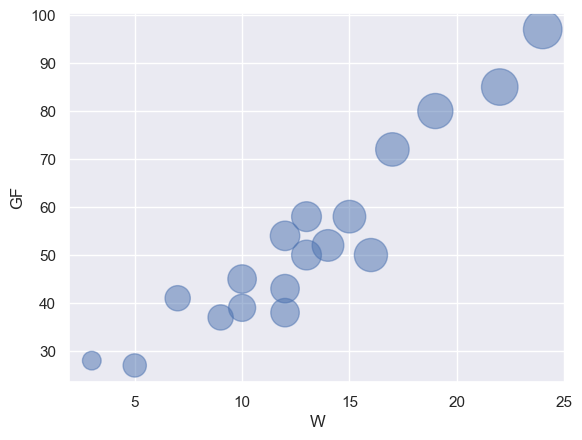

In [133]:
plt.scatter(ger['W'], ger['GF'], s=ger['Pts']*10, alpha=0.5)
plt.xlabel('W')
plt.ylabel('GF')
plt.show()

LIGA ALEMANA: En la grafica de burbuja se muestra la relacion entre las victorias de los equipos en X, los goles a favor en Y, y la relacion son los puntos que han obtenido, entre grande la burbuja mas puntos y si se mueven positivamente sobre el eje x fue que tuvieron mas partidos ganados pero no mas goles a favor. ademas se logra ver en el caso de Alemania los equipos que aunque ganaron, tuvieron pocos goles a favor, lo que se traduce en pocos puntos y burbujas mas pequeñas. podria decirse que ganaron con minima diferencia. todos los datos tienden al centro, para crear una linea recta. para el caso aleman los se concentran en un rango de 10 a 15 victorias y de 40 a 60 goles a favor, y burbujas (puntos) medianas. datos menos dispersos.

aqui se logra comprobar la Conclusion de test estadistico, si hay goles a favor, habran posibilidades de victoria y de puntos. 

 #### Aplicacion del metodo para liga Italiana

In [136]:
from scipy.stats import kendalltau
stat, p = kendalltau(esp["GF"], esp["W"], esp["Pts"] )
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=0.590, p=0.000
Probably dependent


C:\Users\dpino\AppData\Local\Temp\ipykernel_12560\843493509.py:2: DeprecationWarning: 'kendalltau' keyword argument 'initial_lexsort' is deprecated as it is unused and will be removed in SciPy 1.12.0.
  stat, p = kendalltau(esp["GF"], esp["W"], esp["Pts"] )


LIGA ESPAÑOLA: para esta liga Española rechazamos la hipotesis. No hay una relación significativa entre , goles a favor (GF), las victorias que un equipo ha logrado (W) y los Puntos (Pts), en las liga de Española. lo cual nos lleva a apoyar la hipotesis alternativa, hay una relación significativa entre, goles a favor (GF), las victorias que un equipo ha logrado (W) y los Puntos (Pts), en las ligas de Española. en esta liga tambien los goles a favor se relacionan con lasa victorias y los puntos. entre mas goles a favor haya mas probabilidades de victoria y de puntos hay. 

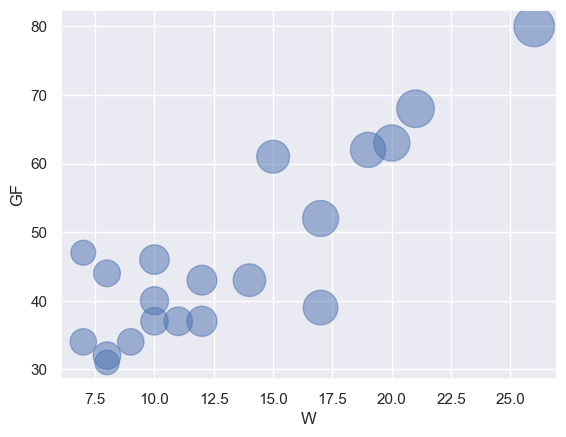

In [137]:
plt.scatter(esp['W'], esp['GF'], s=esp['Pts']*10, alpha=0.5)
plt.xlabel('W')
plt.ylabel('GF')
plt.show()

LIGA ESPAÑOLA: En la grafica de burbuja se muestra la relacion entre las victorias de los equipos en X, los goles a favor en Y, y la relacion son los puntos que han obtenido, entre mas grande la burbuja mas puntos. y las burbujas tienden a concentrarse en el centro para crear una linea recta. por lo cual se logra visualizar la relacion que hay entre las tres variables. ademas se logra ver en el caso de españa los equipos ganaron y tuvieron goles a favor proporcionadamente ( ganaron pocas veces, tuvieron pocos goles a favor), lo que se traduce en pocos puntos y burbujas mas pequeñas con tendencia al fondo del grafico. los equipos que tuvieron mas victorias, tuvieron mas goles a favor y por tanto mas puntos.

aqui se logra comprobar la Conclusion de test estadistico, si hay goles a favor, habran posibilidades de victoria y de puntos. 

#### Conclusion general

las variables Goles a favor, Victorias y Puntos, estan relacionadas entre para las dos ligas, los equipos que deseen mas puntos tendran que tener mas goles a favor y victorias.

si un equipo tiene goles a favor, pero no gana (empata o pierde) sus puntos no seran muchos. 
si un equipo gana con muy pocos goles a favor tampoco tendra muchos puntos
si un equipo tiene muchos goles a favor pero igual pierde, no servira de nada por que los puntos seran bajos.
pero simepre estas dos varialbes, Goles a favor y Victorias, alimentan a los puntos. 